In [3]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [4]:
train_data = pd.read_csv("train.csv")

# Understanding the structure of the data

In [5]:
train_data.shape

(233154, 41)

In [6]:
train_data.head(10)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
5,518279,54513,61900,89.66,67,22807,45,1501,08-09-90,Self employed,...,0,0,1347,0,0,0,1yrs 9mon,2yrs 0mon,0,0
6,529269,46349,61500,76.42,67,22807,45,1502,01-06-88,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
7,510278,43894,61900,71.89,67,22807,45,1501,04-10-89,Salaried,...,0,0,0,0,0,0,0yrs 2mon,0yrs 2mon,0,0
8,490213,53713,61973,89.56,67,22807,45,1497,15-11-91,Self employed,...,0,0,0,0,0,0,4yrs 8mon,4yrs 8mon,1,0
9,510980,52603,61300,86.95,67,22807,45,1492,01-06-68,Salaried,...,0,0,2608,0,0,0,1yrs 7mon,1yrs 7mon,0,0


In [7]:
#Getting the list of columns
print(list(train_data.columns))

['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth', 'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE', 'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'loan_default']


# Process of Data Prep

In [8]:
#Replacing "." in column names with "_"
train_data.columns = train_data.columns.str.replace(".","_")

C:\Users\divya\AppData\Local\Temp\ipykernel_21400\2630410682.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train_data.columns = train_data.columns.str.replace(".","_")


In [9]:
print(list(train_data.columns))

['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date_of_Birth', 'Employment_Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS_SCORE', 'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES', 'loan_default']


Verifying the data types for each column

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date_of_Birth                        233154 non-null  object 
 9   Employment_Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [11]:
pd.set_option('display.max_columns',None)
train_data.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.0,233154.00000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,1.0,0.84032,0.075577,0.144943,0.023242,0.002127,289.462994,2.440636,1.039896,0.156549,1.659001e+05,2.185039e+05,2.180659e+05,0.059081,0.027703,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,0.0,0.36631,0.264320,0.352044,0.150672,0.046074,338.374779,5.217233,1.941496,0.548787,9.422736e+05,2.374794e+06,2.377744e+06,0.626795,0.316057,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,678.000000,3.000000,1.000000,0.000000,3.500650e+04,6.250000e+04,6.080000e+04,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,1.0,1.00000,1.000000,1.000000,1.000000,1.000000,890.000000,453.000000,144.000000,25.000000,9.652492e+07,1.000000e+09,1.000000e+09,52.000000,36.000000,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


### Eliminating Missing Values from the Data Set

In [12]:
train_data.isna().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date_of_Birth                             0
Employment_Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                

In [13]:
#Checking the % of Null values
train_data['Employment_Type'].isna().sum()/train_data.shape[0]

0.0328581109481287

In [14]:
#Since the value is < 5%, we are dropping the Null values
train_data=train_data.drop(train_data[train_data['Employment_Type'].isna()==True].index,axis=0,inplace=False)

In [15]:
train_data.shape

(225493, 41)

In [16]:
## Dropped 7661 rows from the dataset

In [17]:
train_data["Employment_Type"].value_counts(normalize=True)

Self employed    0.566026
Salaried         0.433974
Name: Employment_Type, dtype: float64

<AxesSubplot:xlabel='Employment_Type', ylabel='count'>

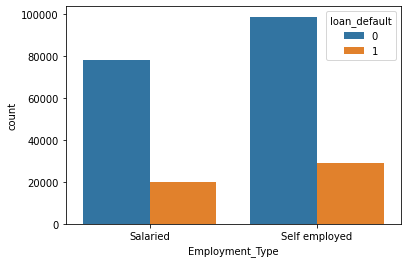

In [18]:
sns.countplot(x="Employment_Type",hue="loan_default",data=train_data)

In [19]:
train_data.isna().sum()

UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date_of_Birth                          0
Employment_Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS_SCORE                      0
PERFORM_CNS_SCORE_DESCRIPTION          0
PRI_NO_OF_ACCTS                        0
PRI_ACTIVE_ACCTS                       0
PRI_OVERDUE_ACCTS                      0
PRI_CURRENT_BALA

Converting data type objects to data type numerics
1. Converting relevant columns to date formats
2. Converting the duartions into months
3. Converting strings into categorical data

In [20]:
#Getting columns & no of records with object data type
for i in train_data.columns:
    if train_data[i].dtype == type(object):
        print(i, end=":")
        print('\n', train_data[i].nunique())
        print()

Date_of_Birth:
 14417

Employment_Type:
 2

DisbursalDate:
 84

PERFORM_CNS_SCORE_DESCRIPTION:
 20

AVERAGE_ACCT_AGE:
 192

CREDIT_HISTORY_LENGTH:
 291



In [21]:
#Getting unique values of object type
for i in train_data.columns:
    if train_data[i].dtype == type(object):
        print(i, end=":")
        print('\n', train_data[i].unique())
        print()

Date_of_Birth:
 ['01-01-84' '31-07-85' '24-08-85' ... '24-03-62' '23-07-66' '08-12-62']

Employment_Type:
 ['Salaried' 'Self employed']

DisbursalDate:
 ['03-08-18' '26-09-18' '01-08-18' '26-10-18' '19-09-18' '23-09-18'
 '16-09-18' '05-09-18' '29-09-18' '03-09-18' '30-08-18' '31-08-18'
 '22-10-18' '18-09-18' '20-09-18' '06-09-18' '11-10-18' '20-10-18'
 '27-08-18' '08-10-18' '17-09-18' '10-09-18' '18-10-18' '16-08-18'
 '10-10-18' '23-10-18' '30-09-18' '21-09-18' '12-09-18' '21-08-18'
 '14-08-18' '17-10-18' '30-10-18' '06-08-18' '04-10-18' '16-10-18'
 '21-10-18' '15-09-18' '06-10-18' '24-10-18' '28-08-18' '13-09-18'
 '31-10-18' '07-09-18' '24-08-18' '05-10-18' '14-10-18' '13-10-18'
 '11-08-18' '28-09-18' '25-10-18' '29-10-18' '10-08-18' '12-08-18'
 '25-08-18' '26-08-18' '08-08-18' '27-10-18' '18-08-18' '23-08-18'
 '20-08-18' '22-09-18' '24-09-18' '15-10-18' '28-10-18' '14-09-18'
 '04-09-18' '13-08-18' '17-08-18' '29-08-18' '27-09-18' '04-08-18'
 '03-10-18' '08-09-18' '25-09-18' '22-08-18

Date columns require conversion

In [22]:
import datetime as dt

In [23]:
train_data['Date_of_Birth']= pd.to_datetime(train_data['Date_of_Birth'],format='%d-%m-%y')
train_data.loc[train_data['Date_of_Birth'].dt.year >= 2020, 'Date_of_Birth'] -= pd.DateOffset(years=100)

In [24]:
train_data["CREDIT_HISTORY_LENGTH"]= train_data["CREDIT_HISTORY_LENGTH"].str.slice(0,1).astype(int)*12+train_data["CREDIT_HISTORY_LENGTH"].str.slice(-5,-3).astype(int)
train_data["AVERAGE_ACCT_AGE"]= train_data["AVERAGE_ACCT_AGE"].str.slice(0,1).astype(int)*12 + train_data["AVERAGE_ACCT_AGE"].str.slice(-5,-3).astype(int)

In [25]:
train_data['DisbursalDate'] = pd.to_datetime(train_data['DisbursalDate'],format = '%d-%m-%y')

# Transforming Categorical & into dummy variable

In [26]:
#Label Encoding
le = LabelEncoder()
train_data ["PERFORM_CNS_SCORE_DESCRIPTION"] = le.fit_transform (train_data ["PERFORM_CNS_SCORE_DESCRIPTION"])

### Creating dummies for Employement Type and removing the current column

In [27]:
train_data = pd.concat([train_data, pd.get_dummies(train_data ['Employment_Type'], columns=None, sparse=False, drop_first=False, dtype=None)], axis=1)

In [28]:
train_data=train_data.rename(columns={'Self employed':'Self_employed'})

In [29]:
print(list(train_data.columns))

['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date_of_Birth', 'Employment_Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS_SCORE', 'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES', 'loan_default', 'Salaried', 'Self_employed']


In [30]:
train_data = train_data.drop('Employment_Type', axis = 1)

In [31]:
train_data.head(10)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date_of_Birth,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default,Salaried,Self_employed
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,2018-08-03,6,1998,1,1,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,2018-09-26,6,1998,1,1,0,0,0,0,598,8,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,23,23,0,1,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,2018-08-01,6,1998,1,1,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,2018-10-26,6,1998,1,1,0,0,0,0,305,11,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,8,15,1,1,0,1
4,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,2018-09-26,6,1998,1,1,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
5,518279,54513,61900,89.66,67,22807,45,1501,1990-09-08,2018-09-19,6,1998,1,1,0,0,0,0,825,0,2,0,0,0,0,0,0,0,0,0,0,0,1347,0,0,0,21,24,0,0,0,1
6,529269,46349,61500,76.42,67,22807,45,1502,1988-06-01,2018-09-23,6,1998,1,1,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,510278,43894,61900,71.89,67,22807,45,1501,1989-10-04,2018-09-16,6,1998,1,1,0,0,0,0,17,17,1,1,0,72879,74500,74500,0,0,0,0,0,0,0,0,0,0,2,2,0,0,1,0
8,490213,53713,61973,89.56,67,22807,45,1497,1991-11-15,2018-09-05,6,1998,1,1,0,0,0,0,718,3,1,1,0,-41,365384,365384,0,0,0,0,0,0,0,0,0,0,56,56,1,0,0,1
9,510980,52603,61300,86.95,67,22807,45,1492,1968-06-01,2018-09-16,6,1998,1,0,0,1,0,0,818,0,1,0,0,0,0,0,0,0,0,0,0,0,2608,0,0,0,19,19,0,0,1,0


### Deriving age variable from DOB & Disbursal date

In [32]:
train_data['Age'] = train_data['DisbursalDate'].dt.year-train_data['Date_of_Birth'].dt.year

In [33]:
train_data.shape

(225493, 43)

In [34]:
train_data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date_of_Birth,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default,Salaried,Self_employed,Age
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,2018-08-03,6,1998,1,1,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,34
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,2018-09-26,6,1998,1,1,0,0,0,0,598,8,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,23,23,0,1,0,1,33
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,2018-08-01,6,1998,1,1,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,33
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,2018-10-26,6,1998,1,1,0,0,0,0,305,11,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,8,15,1,1,0,1,25
4,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,2018-09-26,6,1998,1,1,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,41


In [35]:
#Dropping Date of Birth and Disbursal Date columns since they are redundant
train_data= train_data.drop(['DisbursalDate','Date_of_Birth'],axis=1)

In [36]:
train_data.shape

(225493, 41)

In [37]:
train_data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default,Salaried,Self_employed,Age
0,420825,50578,58400,89.55,67,22807,45,1441,6,1998,1,1,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,34
1,537409,47145,65550,73.23,67,22807,45,1502,6,1998,1,1,0,0,0,0,598,8,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,23,23,0,1,0,1,33
2,417566,53278,61360,89.63,67,22807,45,1497,6,1998,1,1,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,33
3,624493,57513,66113,88.48,67,22807,45,1501,6,1998,1,1,0,0,0,0,305,11,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,8,15,1,1,0,1,25
4,539055,52378,60300,88.39,67,22807,45,1495,6,1998,1,1,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,41


In [38]:
print(list(train_data.columns))

['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'State_ID', 'Employee_code_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS_SCORE', 'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES', 'loan_default', 'Salaried', 'Self_employed', 'Age']


# Exploratory Data Analysis

In [39]:
train_data.loan_default.value_counts()

0    176526
1     48967
Name: loan_default, dtype: int64

<AxesSubplot:>

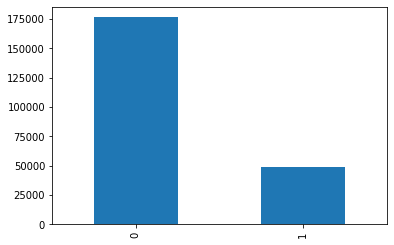

In [40]:
#Checking if Target variable is balanced or not
train_data.loan_default.value_counts().plot(kind='bar')

In [41]:
#Checking for Duplicate Records
duplicate = train_data.duplicated()
print(duplicate.sum())
train_data[duplicate]

0


,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default,Salaried,Self_employed,Age


There are no duplicate records

In [42]:
train_data.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default,Salaried,Self_employed,Age
count,225493.000000,225493.00000,2.254930e+05,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,225493.0,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,2.254930e+05,2.254930e+05,2.254930e+05,225493.000000,225493.000000,225493.000000,2.254930e+05,2.254930e+05,2.254930e+05,2.254930e+05,2.254930e+05,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000
mean,535677.453783,54240.72883,7.563113e+04,74.806634,73.070614,19645.597890,69.072251,3375.718133,7.241551,1550.665453,1.0,0.837720,0.077386,0.147127,0.023686,0.002138,293.040449,9.527466,2.462360,1.053767,0.158989,1.684813e+05,2.220736e+05,2.216098e+05,0.060122,0.028214,0.007362,5.569682e+03,7.489187e+03,7.371104e+03,1.299246e+04,3.256845e+02,0.386602,0.098708,8.833210,13.961107,0.208845,0.217155,0.433974,0.566026,34.448009
std,68337.222749,12775.59006,1.852758e+04,11.441890,70.014147,3494.023799,22.164680,2253.216519,4.460856,975.664631,0.0,0.368708,0.267204,0.354233,0.152069,0.046184,338.874784,5.102380,5.223012,1.952015,0.553415,9.516692e+05,2.411722e+06,2.414697e+06,0.633104,0.318946,0.112301,1.729281e+05,1.860432e+05,1.854703e+05,1.497084e+05,1.575617e+04,0.959668,0.386376,14.184849,21.586951,0.710085,0.412310,0.495622,0.495622,9.666254
min,417428.000000,13320.00000,3.700000e+04,13.500000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,476481.000000,47049.00000,6.562500e+04,68.960000,14.000000,16555.000000,48.000000,1509.000000,4.000000,713.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000
50%,535593.000000,53703.00000,7.080700e+04,76.890000,61.000000,20333.000000,86.000000,2949.000000,6.000000,1452.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000,13.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,33.000000
75%,594774.000000,60213.00000,7.896600e+04,83.730000,130.000000,23004.000000,86.000000,5682.000000,10.000000,2365.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,680.000000,13.000000,3.000000,1.000000,0.000000,3.630000e+04,6.490000e+04,6.299000e+04,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.045000e+03,0.000000e+00,0.000000,0.000000,13.000000,22.000000,0.000000,0.000000,1.000000,1.000000,41.000000
max,671084.000000,987354.00000,1.328954e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,890.000000,19.000000,453.0

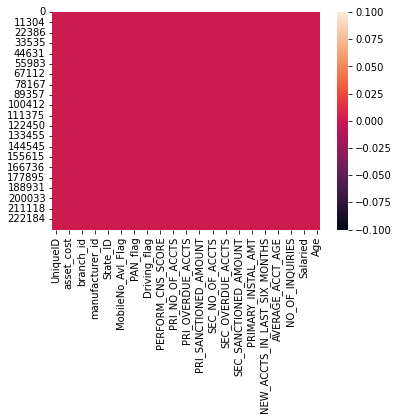

In [43]:
#Check for any missing values through white spots in heat map-
sns.heatmap(train_data.isnull())
plt.show()

No missing values or records

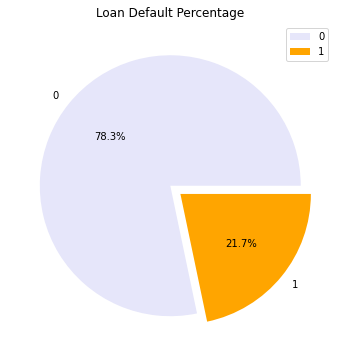

In [44]:
#Different visual to check the distribution of target variable
labels = train_data['loan_default'].value_counts().index
size = train_data['loan_default'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(size, colors=['lavender','orange'], labels = labels, autopct= '%.1f%%', explode=(0,0.1))
plt.title('Loan Default Percentage')
plt.legend()

# Univariate Analysis

In [45]:
# creating list for numerical header

num_features = ['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID','State_ID', 'Employee_code_ID','PERFORM_CNS_SCORE', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES', 'age']

In [46]:
print(len(num_features))

30


<AxesSubplot:xlabel='disbursed_amount', ylabel='Count'>

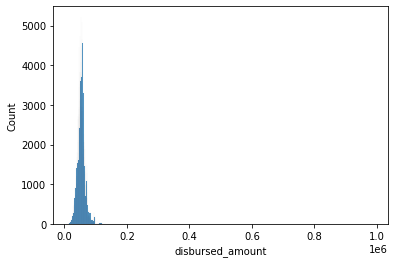

In [47]:
#Univariate- Disbursed Amount
sns.histplot(train_data.disbursed_amount)

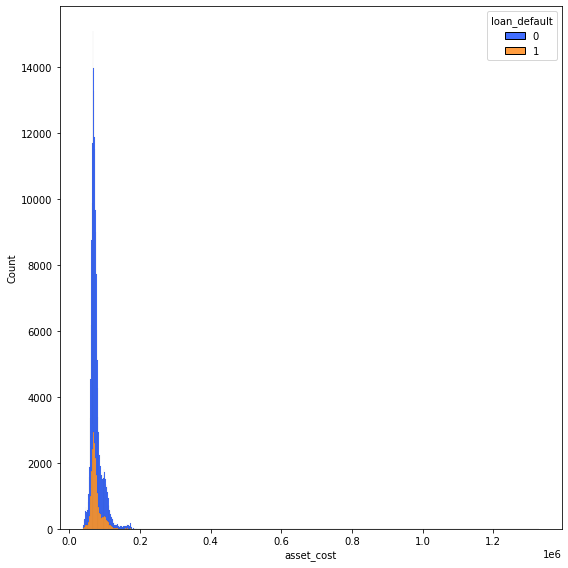

In [48]:
#Univariate- asset cost
fig, ax = plt.subplots(figsize=(8, 8))
sns.histplot(x=train_data.asset_cost,hue=train_data.loan_default,bins=1000,palette='bright',multiple='stack')
fig.tight_layout()
plt.show()

In [49]:
### Asset Cost seems like a good predictor of Loan Default

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python310\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='disbursed_amount'>

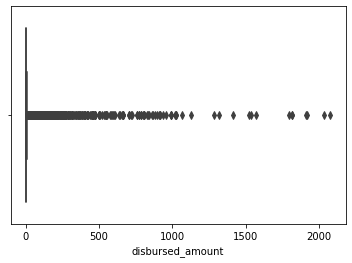

In [50]:
sns.boxplot(train_data.disbursed_amount.value_counts(), orient='v')

<AxesSubplot:xlabel='ltv'>

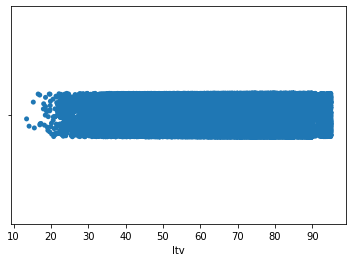

In [51]:
sns.stripplot(x= train_data['ltv'])

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


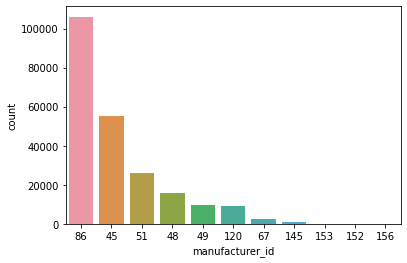

In [52]:
chart = sns.countplot(train_data['manufacturer_id'], order = train_data['manufacturer_id'].value_counts().index)

Some of the manufacturers are prominent, they can be used for Bivariate analysis

(array([81930., 26411., 39714., 12778.,  9046., 29016., 10061.,  2688.,
          183., 13666.]),
 array([  1.,  27.,  53.,  79., 105., 131., 157., 183., 209., 235., 261.]),
 <BarContainer object of 10 artists>)

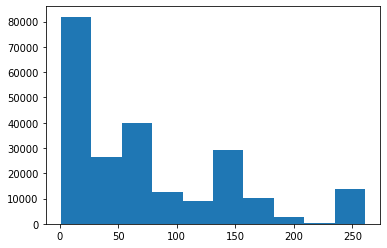

In [53]:
#Checking the spread for Branch ID
plt.hist(train_data['branch_id'], histtype='bar')

#### Branch ID could be a good indicator since majority of the loans were processed by unique branches

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

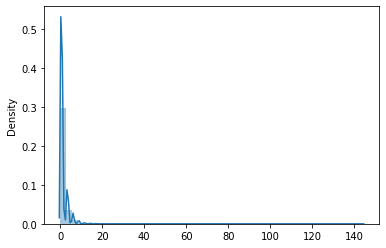

In [54]:
#Checking the spread of count of active accounts at the time of disbursement
sns.distplot(x=train_data.PRI_ACTIVE_ACCTS)

#### PRI_ACTIVE_ACCTS doesnot seem to be a good indicator for further analysis

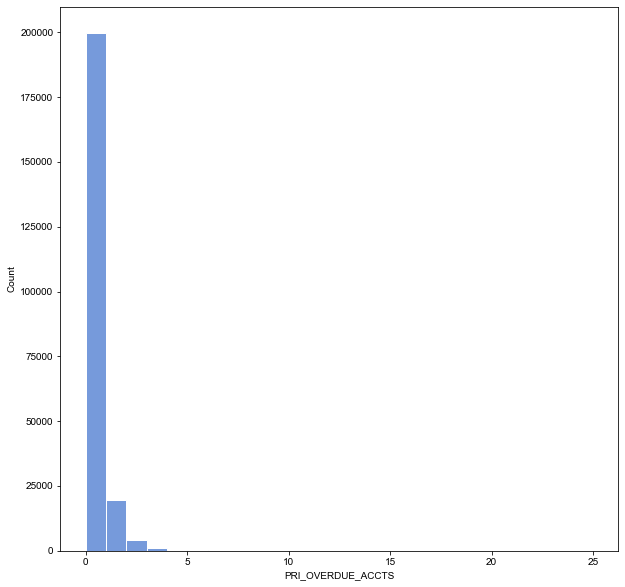

In [55]:
fig,ax = plt.subplots(figsize=(10,10))
sns.set_theme(style="whitegrid")
sns.set_palette("muted",10)
sns.histplot(train_data.PRI_OVERDUE_ACCTS,binwidth=1)
plt.show()
#count of default accounts at the time of disbursement

<AxesSubplot:xlabel='Age', ylabel='Count'>

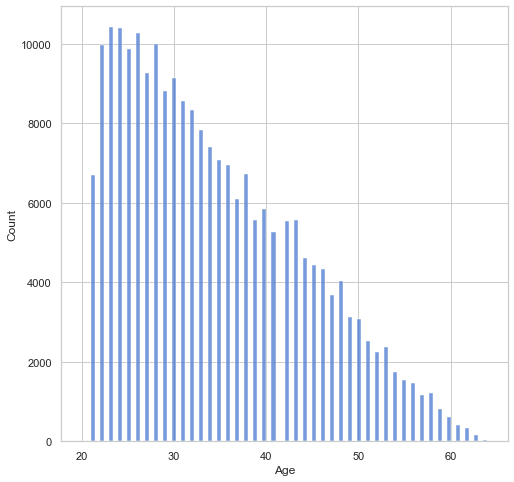

In [56]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.histplot(train_data.Age)

## Outlier Treatment

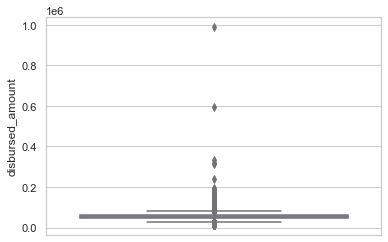

In [57]:
#Check 1- Disbursed amount
sns.set_theme(style="whitegrid")
sns.boxplot(y=train_data.disbursed_amount,palette="cool_r")
plt.show()

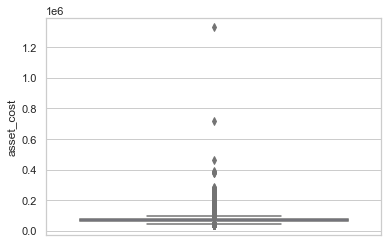

In [58]:
#Check 2- Asset Cost
sns.set_theme(style="whitegrid")
sns.boxplot(y=train_data.asset_cost,palette="cool_r")
plt.show()

In [59]:
#Finding the count of values greater than 200000
train_data.asset_cost[train_data.asset_cost>200000].count()

116

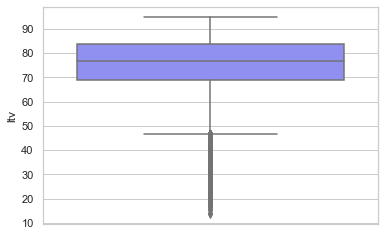

In [60]:
#Check 3- LTV ratio
sns.set_theme(style="whitegrid")
sns.boxplot(y=train_data.ltv,palette="cool_r")
plt.show()

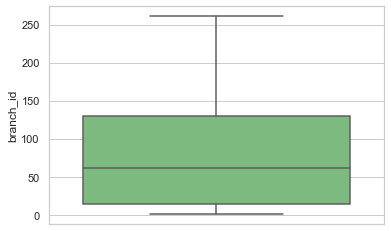

In [61]:
#Check 4- Branch ID
sns.set_theme(style="whitegrid")
sns.boxplot(y=train_data.branch_id,palette="Greens")
plt.show()

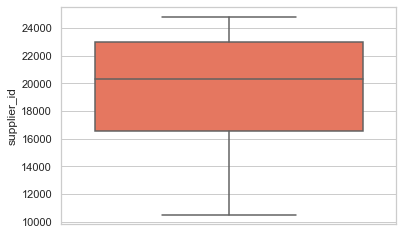

In [62]:
#Check 5- Supplier ID
sns.set_theme(style="whitegrid")
sns.boxplot(y=train_data.supplier_id,palette="Reds")
plt.show()

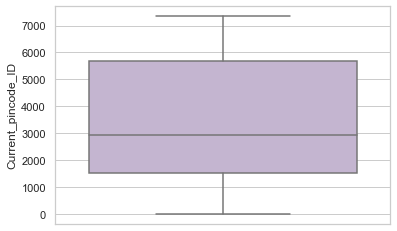

In [63]:
#Check 6- Pincode
sns.set_theme(style="whitegrid")
sns.boxplot(y=train_data.Current_pincode_ID,palette="tab20_r")
plt.show()

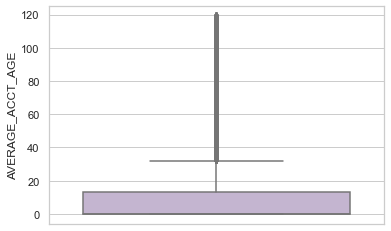

In [64]:
#Check7- Average loan tenure
sns.set_theme(style="whitegrid")
sns.boxplot(y=train_data.AVERAGE_ACCT_AGE,palette="tab20_r")
plt.show()

#### Most of the tenure lie within 0-20 years
#### List of Categorical Features-
1. PERFORM_CNS_SCORE_DESCRIPTION
2. MobileNo_Avl_Flag
3. Aadhar_flag
4. PAN_flag
5. VoterID_flag
6. Driving_flag
7. Passport_flag

<AxesSubplot:>

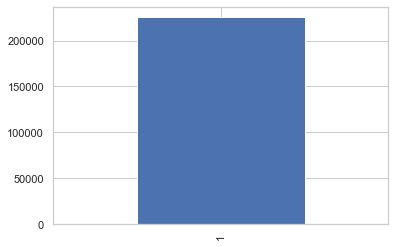

In [65]:
#Checking the categorical variables-
train_data.MobileNo_Avl_Flag.value_counts().plot.bar()

#### Mobile No is not an indicator for defaulting since it was present for all applicants

<AxesSubplot:>

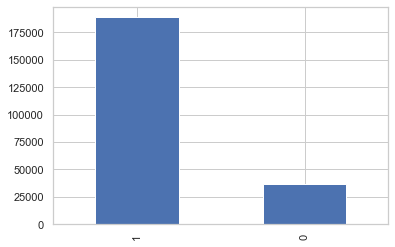

In [66]:
train_data.Aadhar_flag.value_counts().plot.bar()

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 720x360 with 0 Axes>

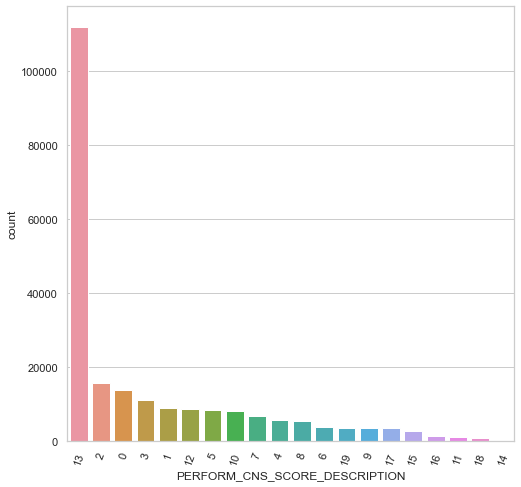

<Figure size 720x360 with 0 Axes>

In [67]:
#Checking Data spread in CNS score description-
fig, ax = plt.subplots(figsize=(8, 8))
chart = sns.countplot(train_data['PERFORM_CNS_SCORE_DESCRIPTION'], order = train_data['PERFORM_CNS_SCORE_DESCRIPTION'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(),rotation=70)
plt.figure(figsize=(10,5))

#### More than 1 Lakh records with no Bureau history available

<AxesSubplot:>

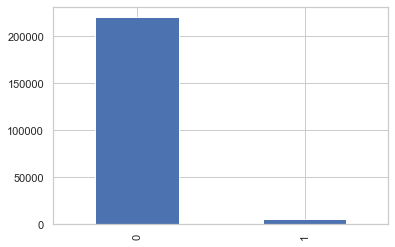

In [68]:
train_data.Driving_flag.value_counts().plot.bar()

#### Around 17k applicants did not submit their DL at the time of application. This makes a good candidiate for Bivariate Analysis

In [69]:
train_data.PAN_flag.value_counts()

0    208043
1     17450
Name: PAN_flag, dtype: int64

Something similar happening for PAN details also. To be checked with defaulted applications

## Bivariate Analysis

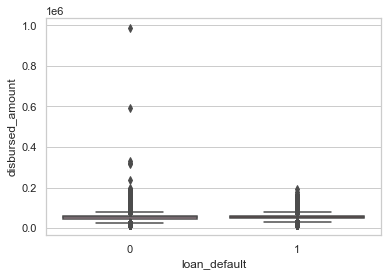

In [70]:
#Check1A- Plot of Disbursed amount & Loan default
sns.set_theme(style="whitegrid")
sns.boxplot(x= train_data.loan_default,y=train_data.disbursed_amount,palette="tab20_r")
plt.show()

In [71]:
#Check 1B- Check mean for both categories of loan default
train_data.groupby('loan_default')['disbursed_amount'].mean()

loan_default
0    53707.242282
1    56163.947454
Name: disbursed_amount, dtype: float64

#### There is not much variation in disbursal amount with respect to Loan default

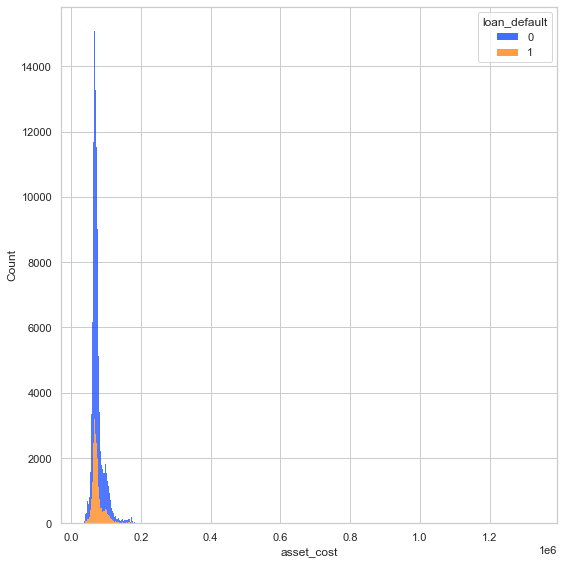

In [72]:
#Check2A- Plot of asset cost & Loan default
fig, ax = plt.subplots(figsize=(8,8))
sns.histplot(x=train_data.asset_cost,hue=train_data.loan_default,bins=1000,palette='bright',multiple='stack')
fig.tight_layout()
plt.show()

In [73]:
#Check 2B- Check mean of asset cost for both categories of loan default
train_data.groupby('loan_default')['asset_cost'].mean()

loan_default
0    75478.714484
1    76180.596504
Name: asset_cost, dtype: float64

<AxesSubplot:xlabel='loan_default', ylabel='branch_id'>

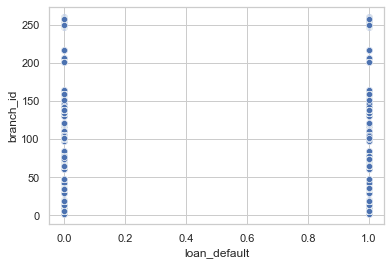

In [74]:
#Check 3- Check spread for branch ID
sns.scatterplot(x = train_data.loan_default, y = train_data.branch_id)

#### Branch ID does not seem to vary much with loan default

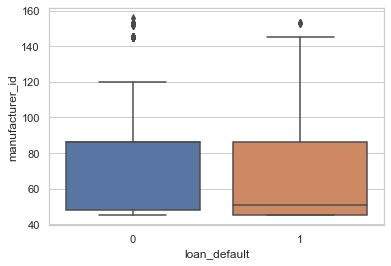

In [75]:
#Check 4-loan default with Manufacture ID to check for variations
sns.boxplot(x= train_data.loan_default, y= train_data.manufacturer_id)
plt.show()

In [76]:
print(list(train_data.columns))

['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'State_ID', 'Employee_code_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS_SCORE', 'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES', 'loan_default', 'Salaried', 'Self_employed', 'Age']


<AxesSubplot:xlabel='Salaried', ylabel='count'>

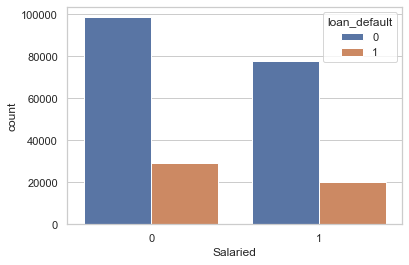

In [77]:
#Check 5- Counting loans default from salaried employees
sns.countplot(x=train_data.Salaried,hue=train_data.loan_default)

<AxesSubplot:xlabel='Self_employed', ylabel='count'>

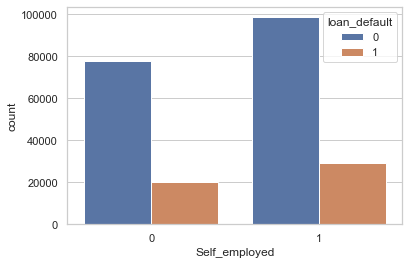

In [78]:
#Check 6- Counting loans default from self employed employees
sns.countplot(x=train_data['Self_employed'], hue= train_data.loan_default)

#### We observe that more people defaulted when they were self employed

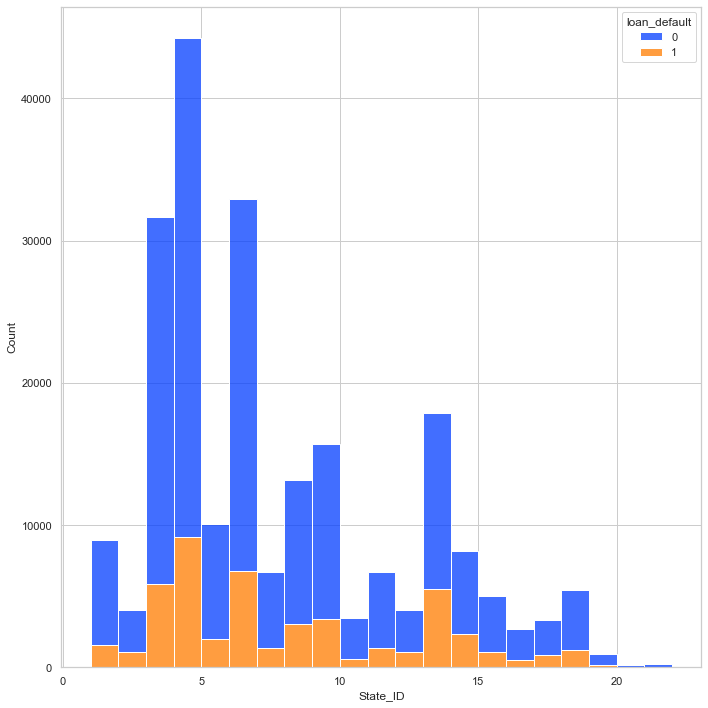

In [79]:
#Check 7- Relation between state ID and Loan default
fig, ax = plt.subplots(figsize=(10, 10))
sns.histplot(x=train_data.State_ID,hue=train_data.loan_default,binwidth=1,palette='bright',multiple='stack')
fig.tight_layout()
plt.show()

#### StateID looks a good indicator for Loan default

## Checking with Categorical Variables

<AxesSubplot:xlabel='PERFORM_CNS_SCORE_DESCRIPTION', ylabel='count'>

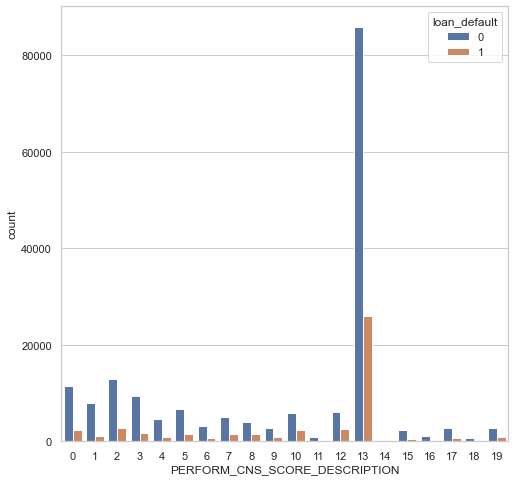

In [80]:
#Check 8- Check loan default with bureau score description
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x=train_data.PERFORM_CNS_SCORE_DESCRIPTION,hue=train_data.loan_default)

Bureau Score description looks like a valid indicator for loan default

<AxesSubplot:xlabel='Aadhar_flag', ylabel='count'>

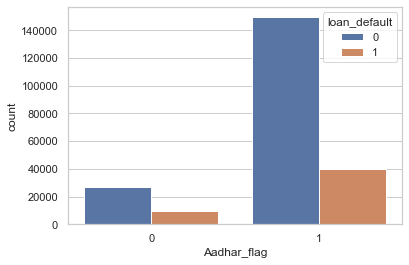

In [81]:
#Check 9- with Aadhar card
sns.countplot(x=train_data.Aadhar_flag,hue=train_data.loan_default)

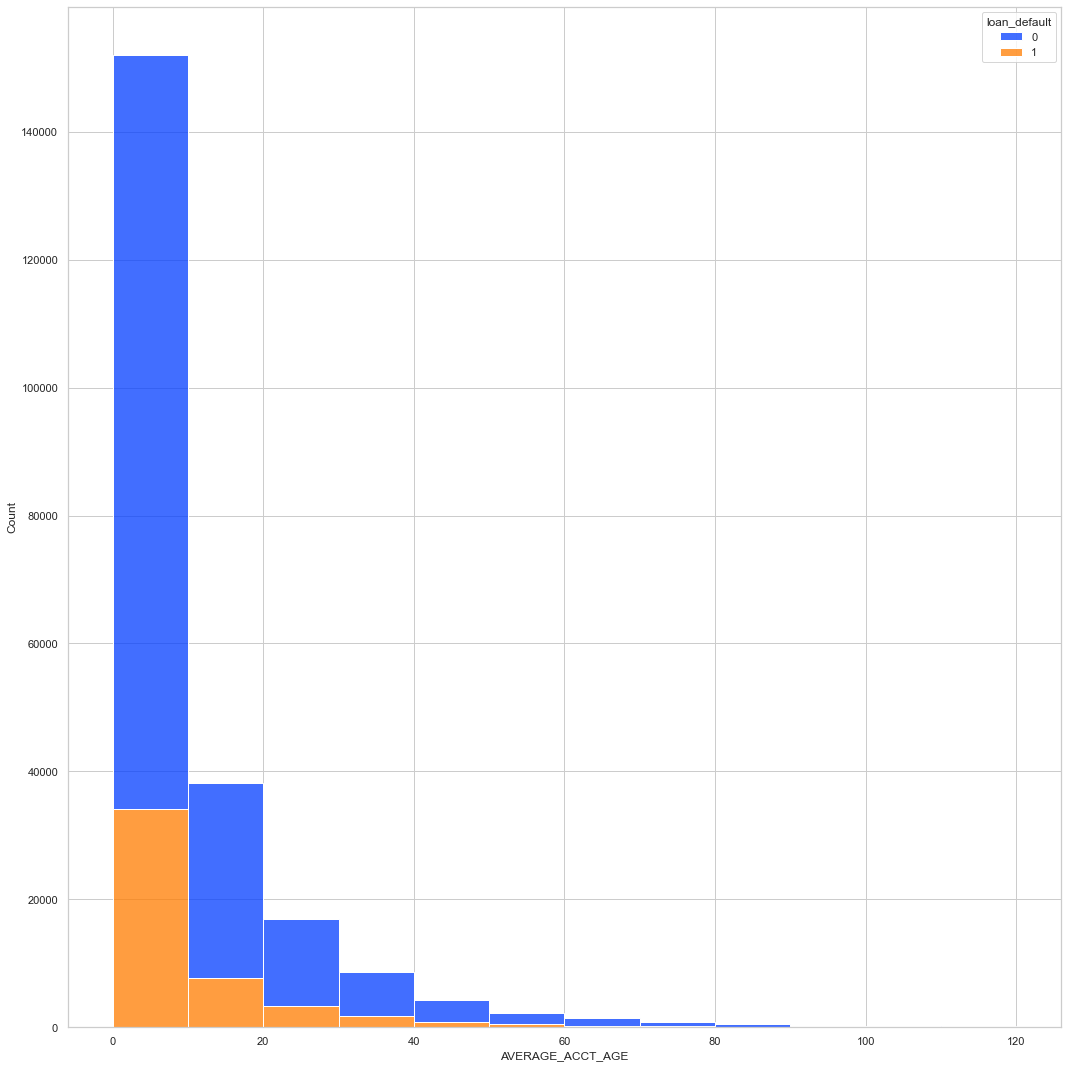

In [82]:
#Check 10- Loan default with average loan Tenure
fig, ax = plt.subplots(figsize=(15, 15))
sns.histplot(x=train_data.AVERAGE_ACCT_AGE,hue=train_data.loan_default,binwidth=10,palette='bright',multiple='stack')
fig.tight_layout()
plt.show()

<AxesSubplot:xlabel='loan_default'>

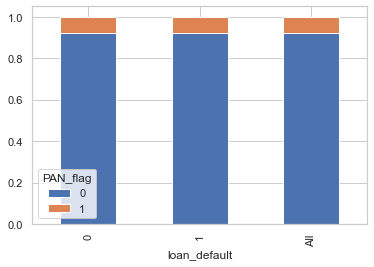

In [83]:
#Check 11- Pan card and loan default
pd.crosstab(train_data.loan_default , train_data.PAN_flag, margins = True, normalize= 'index').plot.bar(stacked = True)

Pan card does not seem to be a good indicator for loan default

<AxesSubplot:xlabel='loan_default'>

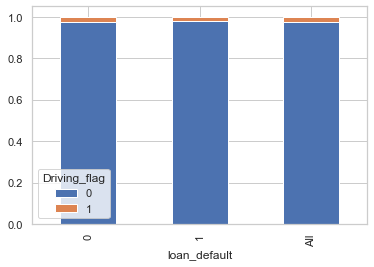

In [84]:
#Check 12- DL submitted and Loan default
pd.crosstab(train_data.loan_default , train_data.Driving_flag, margins = True, normalize= 'index').plot.bar(stacked = True)

<AxesSubplot:xlabel='loan_default'>

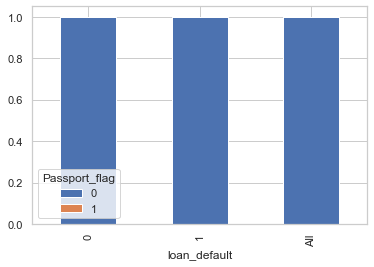

In [85]:
#Check 13- Passport submitted and Loan default
pd.crosstab(train_data.loan_default , train_data.Passport_flag, margins = True, normalize= 'index').plot.bar(stacked = True)

In [86]:
train_data.Passport_flag.value_counts()

0    225011
1       482
Name: Passport_flag, dtype: int64

#### Passport submission is not a valid indicator for loan default

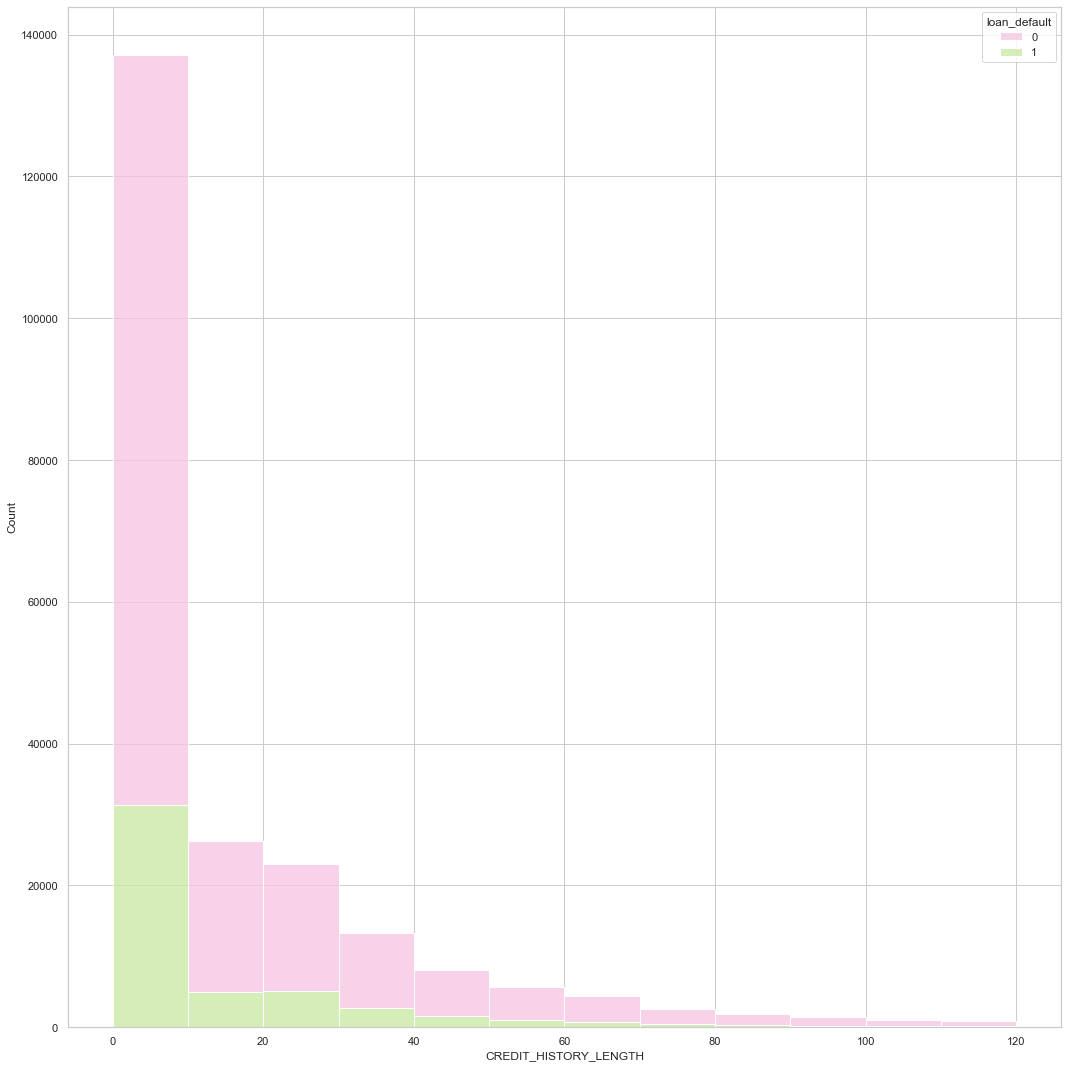

In [87]:
#Check 14- Loan default & Time since first loan
fig, ax = plt.subplots(figsize=(15, 15))
sns.histplot(x=train_data.CREDIT_HISTORY_LENGTH,hue=train_data.loan_default,binwidth=10,palette='PiYG',multiple='stack')
fig.tight_layout()
plt.show()

CREDIT_HISTORY_LENGTH seems like a good predictor of the loan default

<AxesSubplot:xlabel='loan_default'>

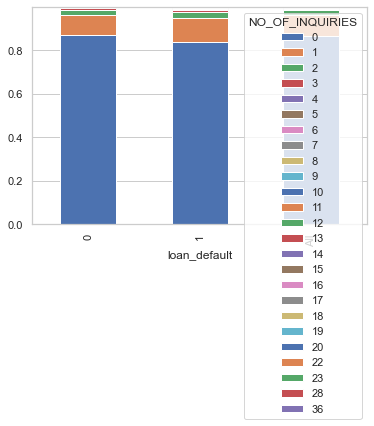

In [88]:
#Check 15- No of enquiries done by customer and Loan default
pd.crosstab(train_data.loan_default , train_data.NO_OF_INQUIRIES, margins = True, normalize= 'index').plot.bar(stacked = True)

#### No of enquiries does not look like a good indicator

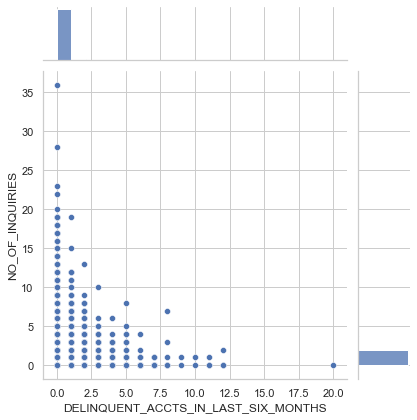

In [89]:
#Check-16: Relation between no of loans defaulted in last 6months and no of enquiries
sns.jointplot(x = train_data.DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS, y = train_data.NO_OF_INQUIRIES, kind = 'scatter')

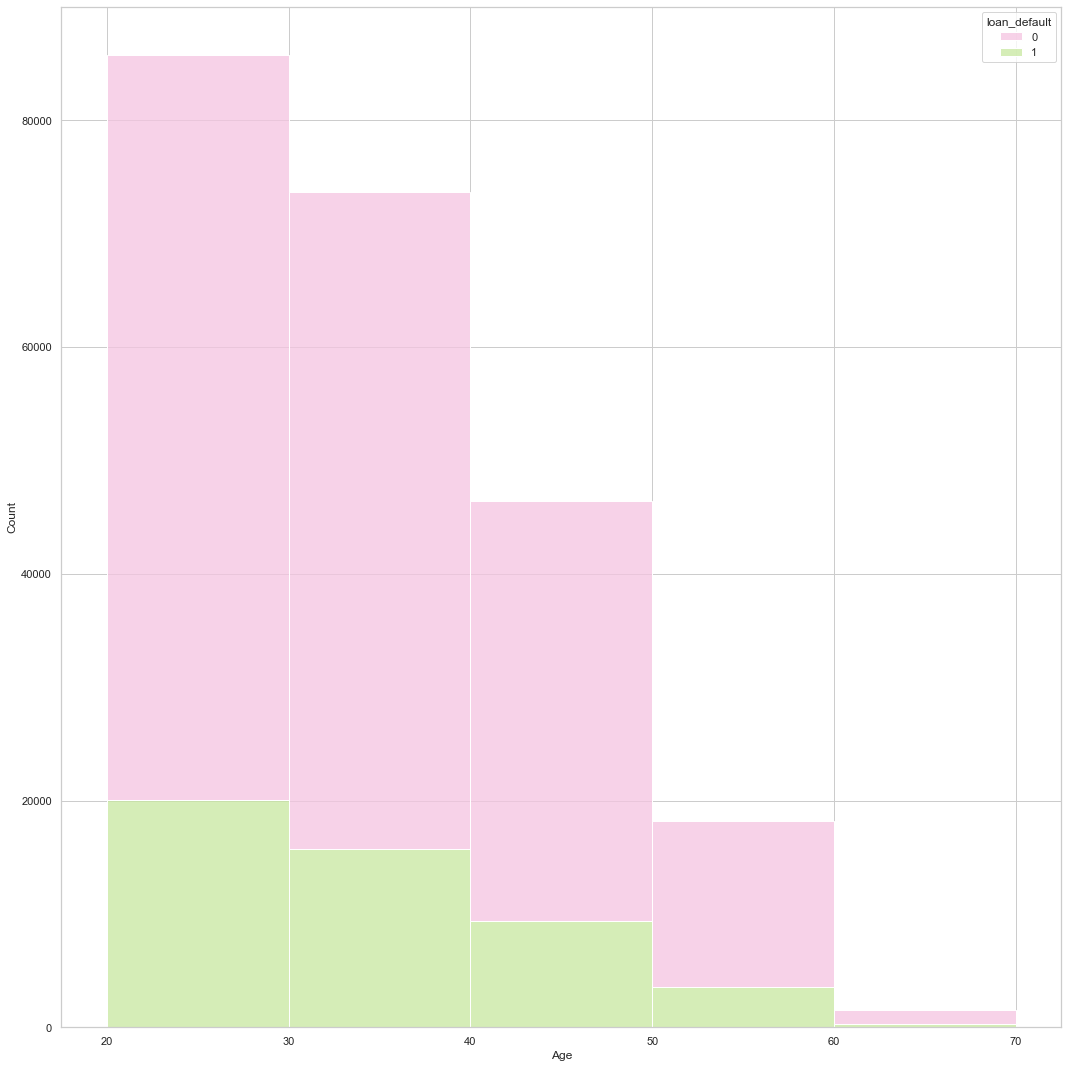

In [90]:
#Checking loan default with Age
fig, ax = plt.subplots(figsize=(15, 15))
sns.histplot(x=train_data.Age,hue=train_data.loan_default,binwidth=10,palette='PiYG',multiple='stack')
fig.tight_layout()
plt.show()

# Conclusion of Bi-Variate Analysis

### Loan default is influenced-
    1. When they were self Employed
    2. When No Bureau History was Available
    3. Age of the applicant increased

# Multi-collinearity Check

In [91]:
pd.options.display.float_format='{:.2f}'.format
train_data.corr()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default,Salaried,Self_employed,Age
UniqueID,1.00,0.15,0.15,-0.03,-0.00,0.03,-0.02,0.03,-0.06,0.08,NaN,-0.00,-0.01,0.01,-0.03,-0.00,-0.01,0.01,-0.01,-0.02,-0.01,-0.01,-0.00,-0.00,-0.04,-0.04,-0.03,-0.01,-0.02,-0.02,-0.01,-0.01,-0.00,-0.01,-0.01,-0.01,0.02,0.03,-0.03,0.03,0.01
disbursed_amount,0.15,1.00,0.75,0.39,0.02,0.08,0.10,0.07,-0.02,0.01,NaN,-0.02,0.02,0.01,0.00,0.01,0.01,-0.00,0.04,0.04,0.02,0.02,0.01,0.01,-0.01,-0.01,-0.01,-0.00,-0.01,-0.01,0.00,-0.01,0.04,0.02,0.00,0.02,0.04,0.08,0.02,-0.02,-0.05
asset_cost,0.15,0.75,1.00,-0.30,0.02,0.15,0.00,0.28,-0.02,0.01,NaN,-0.10,0.05,0.09,0.02,0.01,-0.04,0.04,-0.03,-0.02,-0.01,-0.00,-0.00,-0.00,-0.02,-0.02,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.02,-0.01,-0.01,-0.02,-0.02,0.02,-0.06,0.06,-0.11
ltv,-0.03,0.39,-0.30,1.00,0.00,-0.10,0.12,-0.30,-0.00,0.01,NaN,0.11,-0.04,-0.10,-0.02,0.00,0.08,-0.06,0.09,0.09,0.05,0.03,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.08,0.04,0.03,0.05,0.09,0.10,0.11,-0.11,0.08
branch_id,-0.00,0.02,0.02,0.00,1.00,0.23,-0.05,0.05,0.19,0.09,NaN,-0.04,0.03,0.02,-0.02,-0.01,-0.02,0.02,-0.01,-0.01,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.01,0.00,0.00,0.00,0.01,0.00,-0.01,-0.00,0.00,-0.00,-0.00,0.03,0.02,-0.02,-0.00
supplier_id,0.03,0.08,0.15,-0.10,0.23,1.00,-0.06,0.19,0.12,0.10,NaN,-0.08,0.04,0.08,-0.02,-0.01,-0.08,0.07,-0.07,-0.07,-0.04,-0.02,-0.01,-0.01,-0.03,-0.02,-0.02,-0.01,-0.01,-0.01,-0.01,-0.01,-0.05,-0.02,-0.04,-0.05,-0.03,0.03,-0.09,0.09,-0.04
manufacturer_id,-0.02,0.10,0.00,0.12,-0.05,-0.06,1.00,-0.10,0.02,-0.05,NaN,0.04,-0.03,-0.05,0.01,0.02,0.07,-0.06,0.07,0.07,0.03,0.03,0.02,0.02,0.01,0.01,0.01,0.00,0.00,0.00,0.01,0.00,0.05,0.02,0.04,0.06,0.01,-0.03,0.04,-0.04,0.06
Current_pincode_ID,0.03,0.07,0.28,-0.30,0.05,0.19,-0.10,1.00,0.06,-0.04,NaN,-0.31,0.04,0.29,0.04,-0.01,-0.16,0.14,-0.08,-0.12,-0.06,-0.06,-0.03,-0.03,-0.05,-0.05,-0.04,-0.02,-0.03,-0.03,0.00,-0.01,-0.10,-0.06,-0.06,-0.09,-0.06,0.03,-0.21,0.21,-0.06
State_ID,-0.06,-0.02,-0.02,-0.00,0.19,0.12,0.02,0.06,1.00,0.12,NaN,-0.18,0.12,0.16,0.03,-0.00,-0.05,0.05,-0.01,-0.02,-0.01,-0.01,-0.00,-0.00,0.03,0.03,0.02,0.01,0.02,0.02,0.01,0.01,-0.02,-0.00,-0.01,-0.01,-0.02,0.05,0.05,-0.05,0.02
Employee_code_ID,0.08,0.01,0.01,0.01,0.09,0.10,-0.05,-0.04,0.12,1.00,NaN,0.05,-0.03,-0.05,-0.02,-0.01,-0.01,0.01,0.01,0.01,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,0.01,0.00,0.00,0.00,0.00,0.00,-0.00,0.02,-0.04,0.04,0.01


<AxesSubplot:>

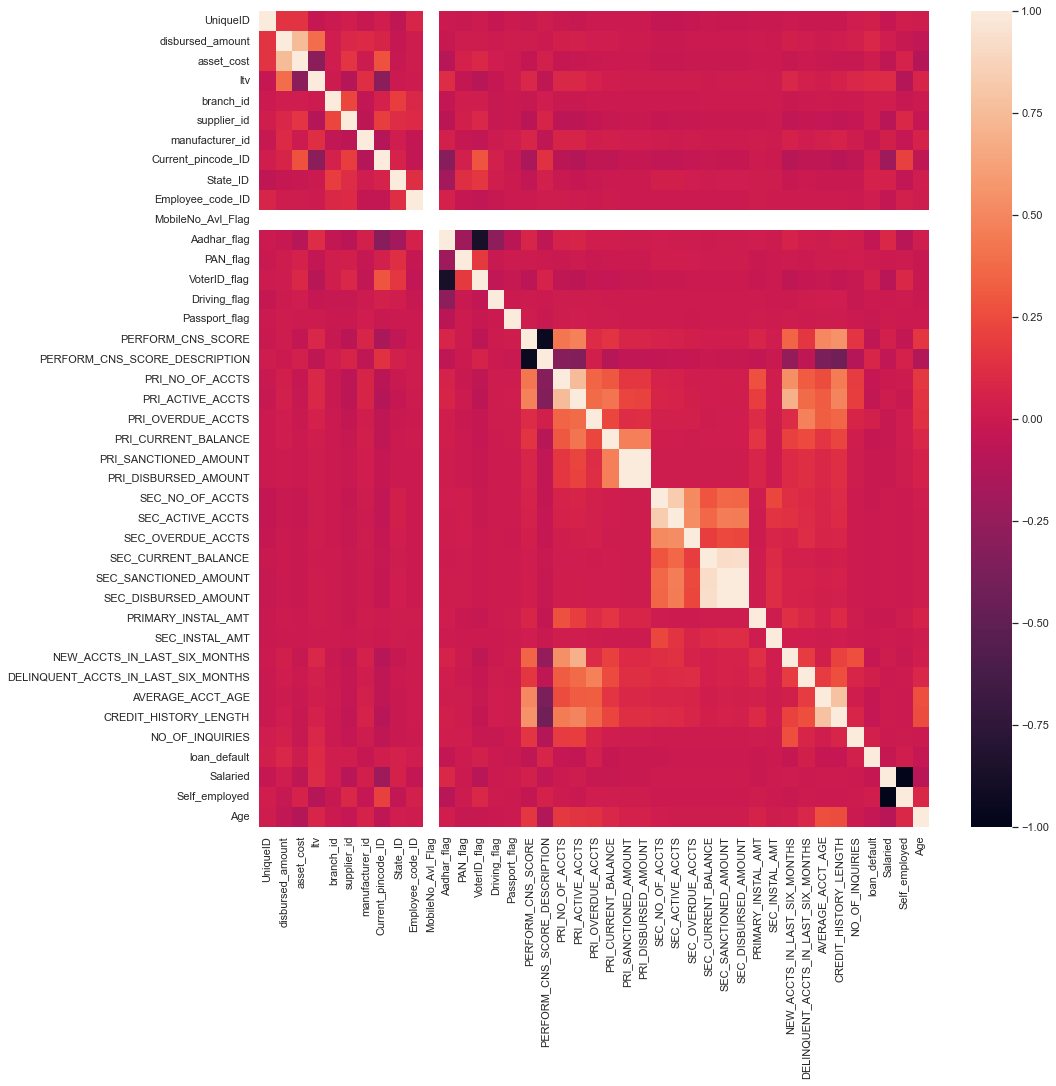

In [92]:
cor=train_data.corr()
fig , ax =plt.subplots(figsize = (15,15))
sns.heatmap(cor,xticklabels=cor.columns.values,yticklabels=cor.columns.values)

## Checking VIF for the multi-collinearity

In [93]:
from patsy import dmatrices

In [94]:
y,X = dmatrices('loan_default~ disbursed_amount + asset_cost+ltv+branch_id+supplier_id+manufacturer_id+Current_pincode_ID+State_ID+Employee_code_ID+MobileNo_Avl_Flag+Aadhar_flag+PAN_flag+VoterID_flag+Driving_flag+Passport_flag+PERFORM_CNS_SCORE+PERFORM_CNS_SCORE_DESCRIPTION+PRI_NO_OF_ACCTS+PRI_ACTIVE_ACCTS+PRI_OVERDUE_ACCTS+PRI_CURRENT_BALANCE+PRI_SANCTIONED_AMOUNT+PRI_DISBURSED_AMOUNT+SEC_NO_OF_ACCTS+SEC_ACTIVE_ACCTS+SEC_OVERDUE_ACCTS+SEC_CURRENT_BALANCE+SEC_SANCTIONED_AMOUNT+SEC_DISBURSED_AMOUNT+PRIMARY_INSTAL_AMT+SEC_INSTAL_AMT+NEW_ACCTS_IN_LAST_SIX_MONTHS+DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS+AVERAGE_ACCT_AGE+CREDIT_HISTORY_LENGTH+NO_OF_INQUIRIES+Salaried+Age',data=train_data,return_type='dataframe')

In [95]:
X.head()

,Intercept,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,Salaried,Age
0,1.00,50578.00,58400.00,89.55,67.00,22807.00,45.00,1441.00,6.00,1998.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,13.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,34.00
1,1.00,47145.00,65550.00,73.23,67.00,22807.00,45.00,1502.00,6.00,1998.00,1.00,1.00,0.00,0.00,0.00,0.00,598.00,8.00,1.00,1.00,1.00,27600.00,50200.00,50200.00,0.00,0.00,0.00,0.00,0.00,0.00,1991.00,0.00,0.00,1.00,23.00,23.00,0.00,0.00,33.00
2,1.00,53278.00,61360.00,89.63,67.00,22807.00,45.00,1497.00,6.00,1998.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,13.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,33.00
3,1.00,57513.00,66113.00,88.48,67.00,22807.00,45.00,1501.00,6.00,1998.00,1.00,1.00,0.00,0.00,0.00,0.00,305.00,11.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,31.00,0.00,0.00,0.00,8.00,15.00,1.00,0.00,25.00
4,1.00,52378.00,60300.00,88.39,67.00,22807.00,45.00,1495.00,6.00,1998.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,13.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,41.00


In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [97]:
vif=pd.DataFrame()

In [98]:
vif["VIF_Factor"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

C:\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [99]:
vif["features"]=X.columns

In [100]:
pd.set_option('display.max_rows', None)
vif.round(1)

,VIF_Factor,features
0,0.00,Intercept
1,30.60,disbursed_amount
2,28.50,asset_cost
3,14.90,ltv
4,1.10,branch_id
5,1.10,supplier_id
6,1.10,manufacturer_id
7,1.40,Current_pincode_ID
8,1.10,State_ID
9,1.00,Employee_code_ID


#### Conclusion 
1. Disbursed amount and Asset cost seem to be correlated (>5)
2. Aadhar_Flag and Voter_Id flag seem to be correlated (>5)
3. PERFORM_CNS_SCORE and PERFORM_CNS_SCORE_DESCRIPTION seem to be correlated (>5)
4. PRI_SANCTIONED_AMOUNT and PRI_DISBURSED_AMOUNT seem to be correlated (>5)
5. SEC_SANCTIONED_AMOUNT and SEC_DISBURSED_AMOUNT seem to be correlated (>5)
6. AVERAGE_ACCT_AGE and CREDIT_HISTORY_LENGTH seem to be correlated (<5)

## Setting up the Models


In [101]:
train_data.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS_SCORE                        int64
PERFORM_CNS_SCORE_DESCRIPTION            int32
PRI_NO_OF_ACCTS                          int64
PRI_ACTIVE_ACCTS                         int64
PRI_OVERDUE_ACCTS                        int64
PRI_CURRENT_B

In [102]:
train_data.shape

(225493, 41)

# MODEL 1 - LOGISTIC REGRESSION MODEL

#### Checking for Assumptions for LR modelling
##### 1) Checking for linearity between variables and the logit Y (loan_default) i.e. are the x variables linearly related to the target variable

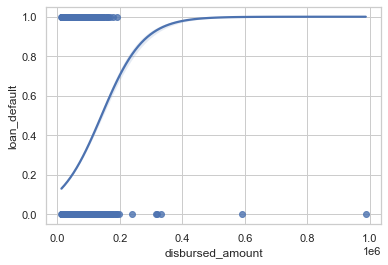

In [103]:
sns.regplot(x=train_data.disbursed_amount,y=train_data.loan_default,logistic=True)
plt.show()

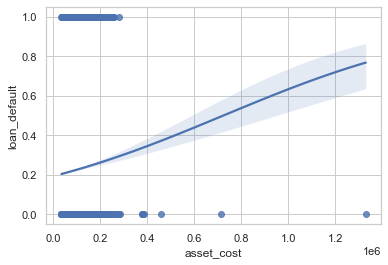

In [104]:
sns.regplot(x=train_data.asset_cost,y=train_data.loan_default,logistic=True)
plt.show()

##### Checking for Normal distribution assumption of underlying data¶

In [105]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

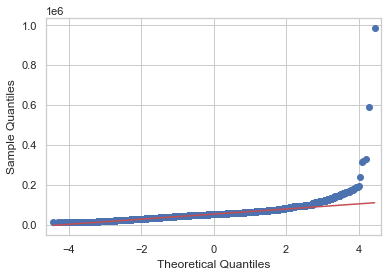

In [106]:
qqplot(train_data.disbursed_amount, line='s')
plt.show()

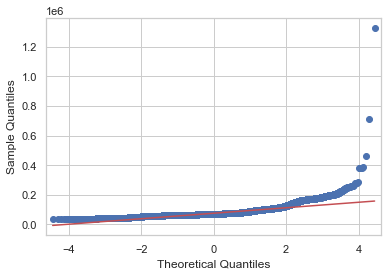

In [107]:
qqplot(train_data.asset_cost, line='s')
pyplot.show()

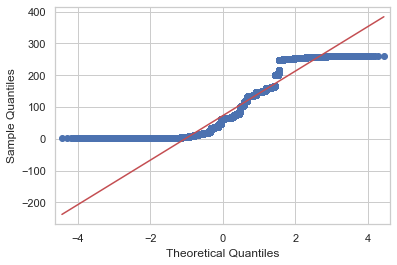

In [108]:
qqplot(train_data.branch_id, line='s')
pyplot.show()

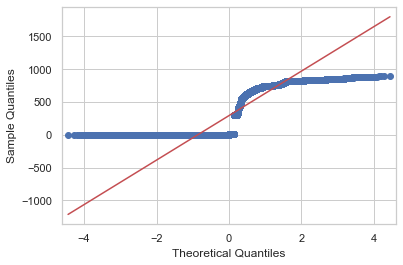

In [109]:
qqplot(train_data.PERFORM_CNS_SCORE, line='s')
pyplot.show()

##### Splitting the data into train and test

In [110]:
data_train=train_data.sample(frac=.80,random_state=20)
data_test=train_data.drop(data_train.index)

In [111]:
import statsmodels.formula.api as smf

In [112]:
import statsmodels.api as sm

In [113]:
train_data.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'State_ID',
       'Employee_code_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS_SCORE',
       'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS',
       'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT',
       'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS',
       'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
       'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES',
       'loan_default', 'Salaried', 'Self_employed', 'Age'],
      dtype='object')

In [114]:
train_data.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS_SCORE                        int64
PERFORM_CNS_SCORE_DESCRIPTION            int32
PRI_NO_OF_ACCTS                          int64
PRI_ACTIVE_ACCTS                         int64
PRI_OVERDUE_ACCTS                        int64
PRI_CURRENT_B

In [115]:
lrmodel1=smf.glm('loan_default~ disbursed_amount + asset_cost+ltv+branch_id+supplier_id+manufacturer_id+Current_pincode_ID + State_ID+Employee_code_ID+ MobileNo_Avl_Flag + Aadhar_flag + PAN_flag + VoterID_flag + Driving_flag + Passport_flag +PERFORM_CNS_SCORE+ PERFORM_CNS_SCORE_DESCRIPTION + PRI_NO_OF_ACCTS+PRI_ACTIVE_ACCTS+PRI_OVERDUE_ACCTS+PRI_CURRENT_BALANCE+PRI_SANCTIONED_AMOUNT+PRI_DISBURSED_AMOUNT+SEC_NO_OF_ACCTS+SEC_ACTIVE_ACCTS+SEC_OVERDUE_ACCTS+SEC_CURRENT_BALANCE+SEC_SANCTIONED_AMOUNT+SEC_DISBURSED_AMOUNT+PRIMARY_INSTAL_AMT+SEC_INSTAL_AMT+NEW_ACCTS_IN_LAST_SIX_MONTHS+DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS+AVERAGE_ACCT_AGE+CREDIT_HISTORY_LENGTH+NO_OF_INQUIRIES+Age+Salaried+Self_employed',data=train_data,family=sm.families.Binomial()).fit()

In [116]:
print(lrmodel1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           loan_default   No. Observations:               225493
Model:                            GLM   Df Residuals:                   225455
Model Family:                Binomial   Df Model:                           37
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1384e+05
Date:                Sat, 27 Aug 2022   Deviance:                   2.2767e+05
Time:                        20:34:31   Pearson chi2:                 2.27e+05
No. Iterations:                     7   Pseudo R-squ. (CS):            0.03622
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

#### Based on initial model following variable do not seem significant
1) disbursed_amount
2) VoterID_flag
3) PRI_SANCTIONED_AMOUNT
4) PRI_DISBURSED_AMOUNT
5) SEC_NO_OF_ACCTS 
6) SEC_ACTIVE_ACCTS
7) SEC_OVERDUE_ACCTS
8) SEC_CURRENT_BALANCE
9) SEC_SANCTIONED_AMOUNT
10) SEC_DISBURSED_AMOUNT 
11) PRIMARY_INSTAL_AMT
12) SEC_INSTAL_AMT
13) AVERAGE_ACCT_AGE

In [117]:
lrmodel2=smf.glm('loan_default~ asset_cost+ltv+branch_id+supplier_id+manufacturer_id+Current_pincode_ID + State_ID+Employee_code_ID+ MobileNo_Avl_Flag + Aadhar_flag + PAN_flag +  Driving_flag + Passport_flag +PERFORM_CNS_SCORE+ PERFORM_CNS_SCORE_DESCRIPTION + PRI_NO_OF_ACCTS+PRI_ACTIVE_ACCTS+PRI_OVERDUE_ACCTS+PRI_CURRENT_BALANCE+NEW_ACCTS_IN_LAST_SIX_MONTHS+DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS+CREDIT_HISTORY_LENGTH+NO_OF_INQUIRIES+Age+Salaried+Self_employed',data=data_train,family=sm.families.Binomial()).fit()

In [118]:
print(lrmodel2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           loan_default   No. Observations:               180394
Model:                            GLM   Df Residuals:                   180369
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -91054.
Date:                Sat, 27 Aug 2022   Deviance:                   1.8211e+05
Time:                        20:34:35   Pearson chi2:                 1.82e+05
No. Iterations:                    16   Pseudo R-squ. (CS):            0.03629
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [119]:
### based on revised model following variable do not seem significant
### NEW_ACCTS_IN_LAST_SIX_MONTHS

In [120]:
### Revising the model again

In [121]:
lrmodel3=smf.glm('loan_default~ asset_cost+ltv+branch_id+supplier_id+manufacturer_id+Current_pincode_ID + State_ID+Employee_code_ID+ MobileNo_Avl_Flag + Aadhar_flag + PAN_flag + Driving_flag + Passport_flag +PERFORM_CNS_SCORE+ PERFORM_CNS_SCORE_DESCRIPTION + PRI_NO_OF_ACCTS+PRI_ACTIVE_ACCTS+PRI_OVERDUE_ACCTS+PRI_CURRENT_BALANCE+DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS+CREDIT_HISTORY_LENGTH+NO_OF_INQUIRIES+Age+Salaried+Self_employed',data=data_train,family=sm.families.Binomial()).fit()

In [122]:
print(lrmodel3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           loan_default   No. Observations:               180394
Model:                            GLM   Df Residuals:                   180370
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -91056.
Date:                Sat, 27 Aug 2022   Deviance:                   1.8211e+05
Time:                        20:34:37   Pearson chi2:                 1.82e+05
No. Iterations:                     6   Pseudo R-squ. (CS):            0.03627
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [123]:
### All variables in the model are significant now 

##### Checking for Model Accuracy

In [124]:
import sklearn.metrics as metrics

In [125]:
x_train=data_train.drop('loan_default',axis=1)

In [126]:
y_train=data_train.drop(x_train.columns,axis=1)

In [127]:
x_test=data_test.drop('loan_default',axis=1)

In [128]:
y_test=data_test.drop(x_test.columns,axis=1)

##### Confusion Matrix

In [129]:
y_pred=lrmodel3.predict(data_test).map(lambda x:1 if x>0.5 else 0)

In [130]:
metrics.confusion_matrix(y_test,y_pred)

array([[35251,    47],
       [ 9748,    53]], dtype=int64)

In [131]:
y_pred2=lrmodel3.predict(data_test)

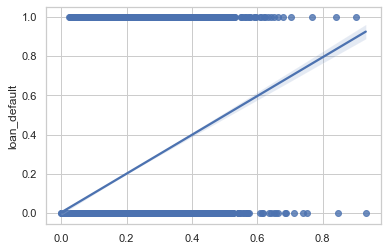

In [132]:
sns.regplot(x=y_pred2, y=y_test)
plt.show()

##### Drawing the ROC Curve

In [133]:
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred2)
x,y=np.arange(0,1.1,.1),np.arange(0,1.1,0.1)

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve')

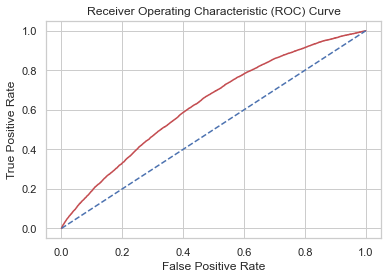

In [134]:
plt.plot(fpr,tpr,'r-')
plt.plot(x,y,'b--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

##### Calculating the Area under the curve¶

In [135]:
auc=metrics.roc_auc_score(y_test,y_pred2)

In [136]:
print('AUC: % .3f' % auc)

AUC:  0.630


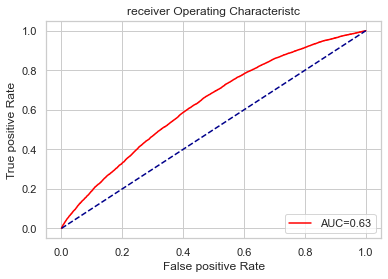

In [137]:
plt.title("receiver Operating Characteristc")
plt.plot(fpr,tpr,'red',label = 'AUC=%0.2f'% auc)
plt.legend(loc = 'lower right')

plt.plot([0,1],[0,1], color = 'darkblue',linestyle='--')
plt.ylabel('True positive Rate')
plt.xlabel('False positive Rate')
plt.show()

#### Calculating the Model Accuracy

In [138]:
metrics.accuracy_score(y_test,y_pred)

0.7828111488059603

#### Logistic Regression (Tuned Model) Accuracy = 78.28 %

## Setting up ML Models

###### We have observed that data is imbalanced in EDA. ML model that we are trying to build might have poor performance on the minority class. To eliminate this, we are trying to oversample the examples of minority class by duplicating them. This will be achieved by "Synthetic Minority Oversampling TEchnique (SMOTE)

In [139]:
import imblearn

##### Checking for Imbalance on Train_y

In [140]:
train_y=y_train

In [141]:
train_x=x_train

In [142]:
unique, count = np.unique(train_y, return_counts=True)
train_y_val_count = {k:v for (k,v) in zip(unique,count)}
train_y_val_count

{0: 141228, 1: 39166}

In [143]:
from imblearn.over_sampling import SMOTE

In [144]:
oversample = SMOTE(random_state=12)
train_x_samp, train_y_samp = oversample.fit_resample(train_x,train_y)

##### Rechecking the imbalance again on target variable

In [145]:
unique, count = np.unique(train_y_samp, return_counts=True)
train_y_val_count_samp = {k:v for (k,v) in zip(unique,count)}
train_y_val_count_samp

{0: 141228, 1: 141228}

##### We see that oversampling of minority class has been achieved

In [146]:
#Normalize the data
from sklearn.preprocessing import StandardScaler    # MinMaxScalar
sc=StandardScaler()
for col in train_x_samp.columns:
    train_x_samp[col] = sc.fit_transform(train_x_samp[col].values.reshape(-1,1))

train_x_samp.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,Salaried,Self_employed,Age
0,1.08,0.10,-0.12,0.17,-0.49,1.01,-1.12,0.83,-1.01,1.21,0.00,0.54,-0.24,-0.36,-0.13,-0.04,-0.85,0.68,-0.46,-0.53,-0.27,-0.17,-0.08,-0.08,-0.09,-0.08,-0.06,-0.03,-0.04,-0.04,-0.09,-0.02,-0.38,-0.23,-0.62,-0.65,-0.28,-0.73,1.01,0.66
1,-0.34,-0.20,-0.02,-0.13,-1.10,-1.29,0.82,0.76,-1.01,-0.88,0.00,0.54,-0.24,-0.36,-0.13,-0.04,-0.85,0.68,-0.46,-0.53,-0.27,-0.17,-0.08,-0.08,-0.09,-0.08,-0.06,-0.03,-0.04,-0.04,-0.09,-0.02,-0.38,-0.23,-0.62,-0.65,-0.28,-0.73,1.01,0.66
2,0.54,2.04,1.84,0.10,-0.68,1.12,0.82,1.11,-1.01,0.48,0.00,0.54,-0.24,-0.36,-0.13,-0.04,-0.85,0.68,-0.46,-0.53,-0.27,-0.17,-0.08,-0.08,-0.09,-0.08,-0.06,-0.03,-0.04,-0.04,-0.09,-0.02,-0.38,-0.23,-0.62,-0.65,-0.28,-0.73,1.01,-0.99
3,1.67,0.26,-0.06,0.30,-0.88,-0.42,0.82,-0.19,1.59,-0.57,0.00,0.54,-0.24,-0.36,-0.13,-0.04,-0.85,0.68,-0.46,-0.53,-0.27,-0.17,-0.08,-0.08,-0.09,-0.08,-0.06,-0.03,-0.04,-0.04,-0.09,-0.02,-0.38,-0.23,-0.62,-0.65,-0.28,1.37,-0.99,0.33
4,0.50,2.36,5.52,-2.38,-0.01,0.28,-0.08,-0.38,-0.77,-1.50,0.00,-1.87,-0.24,2.81,-0.13,-0.04,-0.85,0.68,-0.46,-0.53,-0.27,-0.17,-0.08,-0.08,-0.09,-0.08,-0.06,-0.03,-0.04,-0.04,-0.09,-0.02,-0.38,-0.23,-0.62,-0.65,1.22,1.37,-0.99,-1.21


#### For better accuracy, we have normalised the X variables now 

# Spliting the data into train & test

In [147]:
from sklearn.model_selection import train_test_split

#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
X_train_ML,X_test_ML,y_train_ML,y_test_ML = train_test_split(train_x_samp,train_y_samp,test_size = 0.2, 
                                                 random_state = 0, stratify = train_y_samp)

In [148]:
print("Size of X",train_x_samp.shape)
print("Size of y",train_y_samp.shape)
print("Size of X_train",X_train_ML.shape)
print("Size of y_train",y_train_ML.shape)

Size of X (282456, 40)
Size of y (282456, 1)
Size of X_train (225964, 40)
Size of y_train (225964, 1)


# MODEL 2 -  Random Forest classifier

In [149]:
from sklearn.ensemble import RandomForestClassifier

In [150]:
rfc =RandomForestClassifier(n_estimators=20,oob_score=True,random_state=400)
rfc.fit(X_train_ML,y_train_ML)

C:\Users\divya\AppData\Local\Temp\ipykernel_21400\3645821252.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train_ML,y_train_ML)
C:\Python310\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(n_estimators=20, oob_score=True, random_state=400)

In [151]:
rfc.oob_score_       #Gives initial idea about performance of the model

0.8169398665274115

In [152]:
rfc.score(X_test_ML,y_test_ML)

0.844137222969624

##### Hypertuning of parameters to look for best scores

In [153]:
ls=[]
for w in range(20,420,30):
    rfc=RandomForestClassifier(n_estimators=w,oob_score=True,random_state=400)
    rfc.fit(X_train_ML,y_train_ML)
    oob=rfc.oob_score_
    print('For n_estimators = ',w)
    print('OOB score is ',oob)
    print('************************')
    ls.append((oob,w))

C:\Users\divya\AppData\Local\Temp\ipykernel_21400\261574040.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train_ML,y_train_ML)
C:\Python310\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\divya\AppData\Local\Temp\ipykernel_21400\261574040.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train_ML,y_train_ML)


For n_estimators =  20
OOB score is  0.8169398665274115
************************
For n_estimators =  50
OOB score is  0.8390053282823813
************************


C:\Users\divya\AppData\Local\Temp\ipykernel_21400\261574040.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train_ML,y_train_ML)


For n_estimators =  80
OOB score is  0.8449930077357455
************************


C:\Users\divya\AppData\Local\Temp\ipykernel_21400\261574040.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train_ML,y_train_ML)


For n_estimators =  110
OOB score is  0.8485333947000407
************************


C:\Users\divya\AppData\Local\Temp\ipykernel_21400\261574040.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train_ML,y_train_ML)


For n_estimators =  140
OOB score is  0.8505469897859836
************************


C:\Users\divya\AppData\Local\Temp\ipykernel_21400\261574040.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train_ML,y_train_ML)


For n_estimators =  170
OOB score is  0.8516489352286205
************************


C:\Users\divya\AppData\Local\Temp\ipykernel_21400\261574040.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train_ML,y_train_ML)


For n_estimators =  200
OOB score is  0.8525694358393372
************************


C:\Users\divya\AppData\Local\Temp\ipykernel_21400\261574040.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train_ML,y_train_ML)


For n_estimators =  230
OOB score is  0.8531757271069728
************************


C:\Users\divya\AppData\Local\Temp\ipykernel_21400\261574040.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train_ML,y_train_ML)


For n_estimators =  260
OOB score is  0.8539413357880016
************************


C:\Users\divya\AppData\Local\Temp\ipykernel_21400\261574040.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train_ML,y_train_ML)


For n_estimators =  290
OOB score is  0.8542157157777345
************************


C:\Users\divya\AppData\Local\Temp\ipykernel_21400\261574040.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train_ML,y_train_ML)


For n_estimators =  320
OOB score is  0.8544812448000566
************************


C:\Users\divya\AppData\Local\Temp\ipykernel_21400\261574040.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train_ML,y_train_ML)


For n_estimators =  350
OOB score is  0.8547600502734949
************************


C:\Users\divya\AppData\Local\Temp\ipykernel_21400\261574040.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train_ML,y_train_ML)


For n_estimators =  380
OOB score is  0.8551229399373351
************************


C:\Users\divya\AppData\Local\Temp\ipykernel_21400\261574040.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train_ML,y_train_ML)


For n_estimators =  410
OOB score is  0.8553884689596573
************************


In [154]:
#Trying with different values
rfc =RandomForestClassifier(n_estimators=420,oob_score=True,random_state=0)
rfc.fit(X_train_ML,y_train_ML)

C:\Users\divya\AppData\Local\Temp\ipykernel_21400\4228402306.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train_ML,y_train_ML)


RandomForestClassifier(n_estimators=420, oob_score=True, random_state=0)

In [155]:
rfc.oob_score_

0.8555566373404613

In [156]:
#Taking the maximum value from the parameter hypertuning
max(ls)

(0.8553884689596573, 410)

In [157]:
#Finalised the trees
rfc =RandomForestClassifier(n_estimators=410,oob_score=True,random_state=400)
rfc.fit(X_train_ML,y_train_ML)

C:\Users\divya\AppData\Local\Temp\ipykernel_21400\3311865613.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train_ML,y_train_ML)


RandomForestClassifier(n_estimators=410, oob_score=True, random_state=400)

In [158]:
rfc.oob_score_

0.8553884689596573

##### Feature Importance

In [159]:
# Feature Importance
len(rfc.estimators_)

410

In [160]:
importance = rfc.feature_importances_

In [161]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.05812
Feature: 1, Score: 0.06063
Feature: 2, Score: 0.05342
Feature: 3, Score: 0.06653
Feature: 4, Score: 0.05791
Feature: 5, Score: 0.04691
Feature: 6, Score: 0.07429
Feature: 7, Score: 0.06739
Feature: 8, Score: 0.03180
Feature: 9, Score: 0.04922
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.02296
Feature: 12, Score: 0.00722
Feature: 13, Score: 0.02273
Feature: 14, Score: 0.00756
Feature: 15, Score: 0.00068
Feature: 16, Score: 0.04031
Feature: 17, Score: 0.01916
Feature: 18, Score: 0.01471
Feature: 19, Score: 0.00796
Feature: 20, Score: 0.00365
Feature: 21, Score: 0.01523
Feature: 22, Score: 0.01554
Feature: 23, Score: 0.01520
Feature: 24, Score: 0.00105
Feature: 25, Score: 0.00052
Feature: 26, Score: 0.00023
Feature: 27, Score: 0.00067
Feature: 28, Score: 0.00072
Feature: 29, Score: 0.00072
Feature: 30, Score: 0.01932
Feature: 31, Score: 0.00060
Feature: 32, Score: 0.00546
Feature: 33, Score: 0.00268
Feature: 34, Score: 0.01504
Feature: 35, Score: 0.01616
Fe

In [162]:
importance.sort()

In [163]:
print(importance)

[0.         0.0002339  0.00051813 0.00060088 0.000667   0.00067871
 0.00071878 0.00072155 0.00104602 0.00268119 0.00365495 0.00546101
 0.0067177  0.00722224 0.00755939 0.00795523 0.0147118  0.01504099
 0.01520218 0.01523464 0.01553914 0.01615538 0.01915824 0.01932455
 0.02273297 0.02295515 0.03180049 0.04030894 0.04371289 0.04691403
 0.0492161  0.05342392 0.05569708 0.05791452 0.05812299 0.0606257
 0.06653377 0.06739207 0.07155547 0.0742903 ]


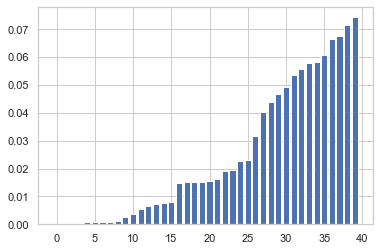

In [164]:
from matplotlib import pyplot
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

##### Getting further details

In [165]:
y_pred = rfc.predict(X_test_ML)

In [166]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix, roc_curve, auc

In [167]:
accuracy_score(y_test_ML,y_pred)

0.857785173121858

In [168]:
f1_score(y_test_ML,y_pred)

0.8424829425143127

[[26973  1273]
 [ 6761 21485]]


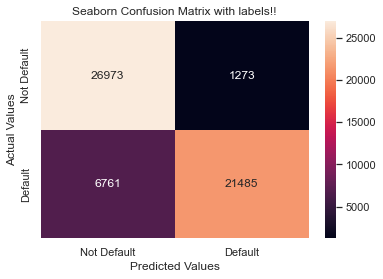

In [169]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_ML,y_pred)

## Print the Confusion Matrix
print(cm)

ax = sns.heatmap(cm, annot=True, fmt='g');


ax.set_title('Seaborn Confusion Matrix with labels!!');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

## For the Tick Labels, the labels should be in Alphabetical order
ax.xaxis.set_ticklabels(['Not Default', 'Default'])
ax.yaxis.set_ticklabels(['Not Default', 'Default'])

# call the matplotlib show() function to display the visualization of the Confusion Matrix.
plt.show()

In [170]:
probs = rfc.predict_proba(X_test_ML)
prob_positive = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test_ML,prob_positive)
roc_auc = auc(fpr,tpr)
roc_auc

0.9152622584399233

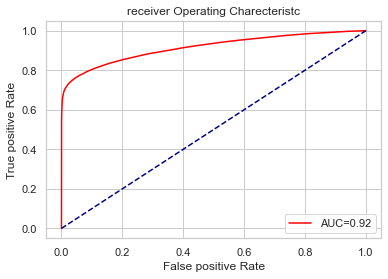

In [171]:
plt.title("receiver Operating Charecteristc")
plt.plot(fpr,tpr,'red',label = 'AUC=%0.2f'% roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0,1],[0,1], color = 'darkblue',linestyle='--')
plt.ylabel('True positive Rate')
plt.xlabel('False positive Rate')
plt.show()

# MODEL 3 - Decision Tree Model

In [172]:
from sklearn.tree import DecisionTreeClassifier

In [173]:
dectree = DecisionTreeClassifier(random_state=0)
dectree.fit(X_train_ML,y_train_ML)

DecisionTreeClassifier(random_state=0)

In [174]:
y_predict_dtree = dectree.predict(X_test_ML)

In [175]:
f1_score(y_test_ML,y_predict_dtree)

0.7723979378570432

In [176]:
probs = dectree.predict_proba(X_test_ML)
prob_positive = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test_ML,prob_positive)
roc_auc = auc(fpr,tpr)
roc_auc

0.7686752106492956

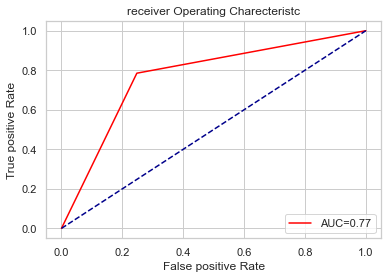

In [177]:
plt.title("receiver Operating Charecteristc")
plt.plot(fpr,tpr,'red',label = 'AUC=%0.2f'% roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0,1],[0,1], color = 'darkblue',linestyle='--')
plt.ylabel('True positive Rate')
plt.xlabel('False positive Rate')
plt.show()

In [178]:
cm  = confusion_matrix(y_test_ML,dectree.predict(X_test_ML))
cm

array([[21250,  6996],
       [ 6072, 22174]], dtype=int64)

In [179]:
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [180]:
Precision = (TP/(TP+FP))
recall = (TP/(FN+TP))
f1score = 2*(Precision*recall)/(Precision+recall)
print(Precision,recall,f1score)

0.7601645526225574 0.785031508886214 0.7723979378570432
